In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("~/dev/gachon-ai/datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
y.shape

(768, 2)

In [6]:
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [10]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_crossentropy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [11]:
N_EPOCHS = 60
history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# y_test_class = np.argmax(y_test)
# y_pred_class = np.argmax(y_pred)

Epoch 1/60


2025-04-07 17:45:07.324023: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 0s 10ms/step - loss: 4.6354 - binary_crossentropy: 4.6354 - val_loss: 0.7903 - val_binary_crossentropy: 0.7903
Epoch 2/60
20/20 [==============================] - 0s 1ms/step - loss: 0.8236 - binary_crossentropy: 0.8236 - val_loss: 0.7991 - val_binary_crossentropy: 0.7991
Epoch 3/60
20/20 [==============================] - 0s 1ms/step - loss: 0.7571 - binary_crossentropy: 0.7571 - val_loss: 1.1869 - val_binary_crossentropy: 1.1869
Epoch 4/60
20/20 [==============================] - 0s 1ms/step - loss: 0.7582 - binary_crossentropy: 0.7582 - val_loss: 0.6697 - val_binary_crossentropy: 0.6697
Epoch 5/60
20/20 [==============================] - 0s 1ms/step - loss: 0.7467 - binary_crossentropy: 0.7467 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009
Epoch 6/60
20/20 [==============================] - 0s 1ms/step - loss: 0.7328 - binary_crossentropy: 0.7328 - val_loss: 0.6358 - val_binary_crossentropy: 0.6358
Epoch 7/60
20/20 [====================

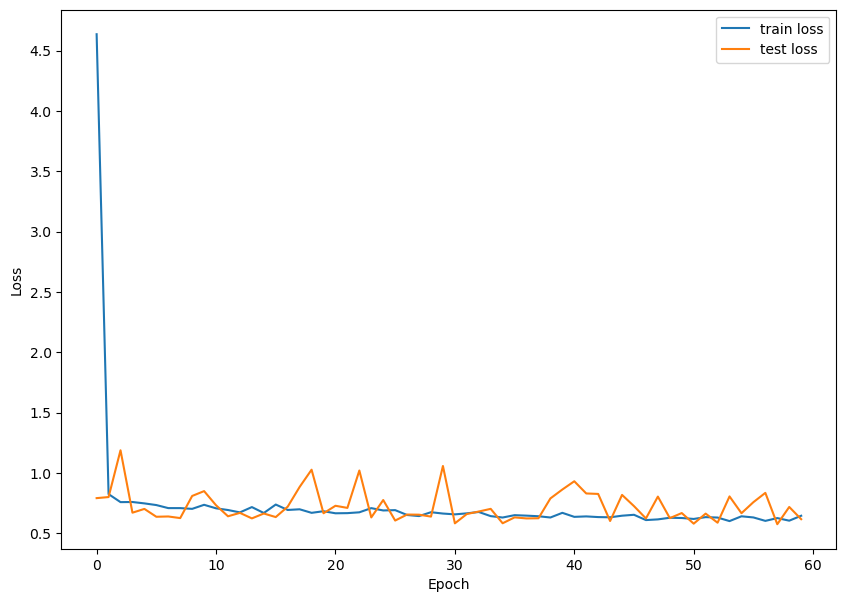

In [12]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()